# RPy2 in Python 3 (Ubuntu Linux) kernel using ggplot2

In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
import rpy2.robjects as ro

In [3]:
import math, datetime
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr, data
base = importr('base')

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/lib/ggplot2.py:72: UserWarning: This was designed againt ggplot2 version 3.2.1 but you have 3.3.0
  'have %s' % (TARGET_VERSION, ggplot2.__version__))


In [4]:
datasets = importr('datasets')
mtcars = data(datasets).fetch('mtcars')['mtcars']

In [5]:
mtcars

R object with classes: ('data.frame',) mapped to:
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  mpg: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[21.000000, 21.000000, 22.800000, 21.400000, ..., 15.800000, 19.700000, 15.000000, 21.400000]
  cyl: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[6.000000, 6.000000, 4.000000, 6.000000, ..., 8.000000, 6.000000, 8.000000, 4.000000]
  disp: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[160.000000, 160.000000, 108.000000, 258.000000, ..., 351.000000, 145.000000, 301.000000, 121.000000]
  hp: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[110.000000, 110.000000, 93.000000, 110.000000, ..., 264.000000, 175.000000, 335.000000, 109.000000]
...
  wt: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[0.000000, 0.000000, 1.000000, 1.000000, ..., 0.000000, 0.000000, 0.000000, 1.000000]
  qsec: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[1.000000, 1.000000, 1.000000, 0.000000, ..., 1.000000, 1.000000, 1.000000, 1.000000]
  vs: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[4.000000, 4.000000, 4.000000, 3.000000, ..., 5.000000, 5.000000, 5.000000, 4.000000]
  am: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[4.000000, 4.000000, 1.000000, 1.000000, ..., 4.000000, 6.000000, 8.000000, 2.000000]

## Plotting via a temp file

In [6]:
# credits: https://stackoverflow.com/questions/15060838/using-rpy2-with-ipython-notebooks

import uuid
from rpy2.robjects.packages import importr
from IPython.core.display import Image

grdevices = importr('grDevices')


def ggplot_notebook(gg, width=800, height=600, name=None):
    fn = name or '{uuid}.png'.format(uuid=uuid.uuid4())
    grdevices.png(fn, width=width, height=height)
    gg.plot()
    grdevices.dev_off()
    return Image(filename=fn)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



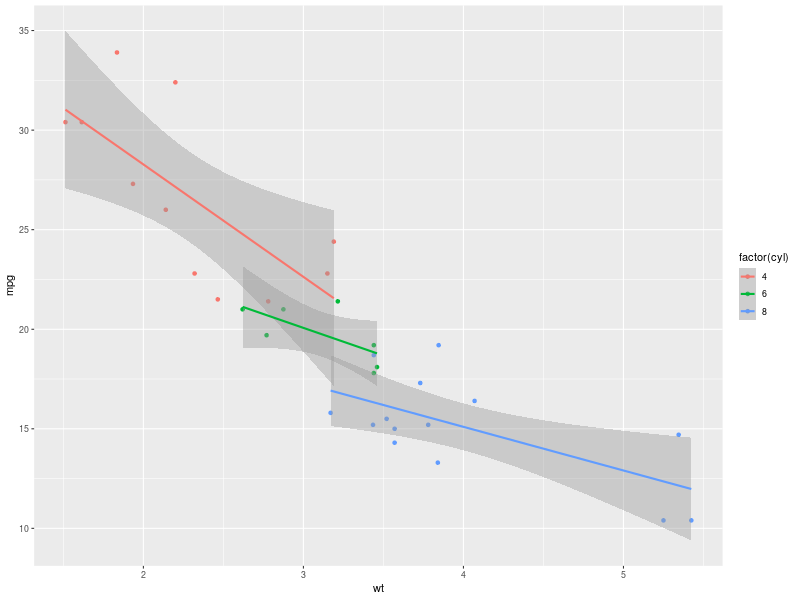

In [7]:
pp = ggplot2.ggplot(mtcars) + \
     ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') + \
     ggplot2.geom_point() + \
     ggplot2.geom_smooth(ggplot2.aes_string(group = 'cyl'), method = 'lm')

ggplot_notebook(pp, name="rpy2_cars.png")

R[write to console]: `geom_smooth()` using formula 'y ~ x'



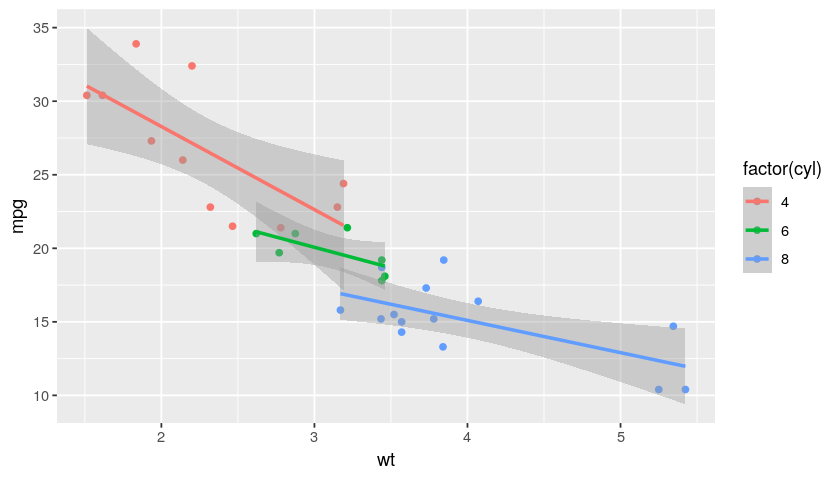

In [8]:
%%R -i mtcars -w 7 -h 4 --units in -r 120
require(ggplot2)
pp = ggplot(mtcars) +
     aes_string(x='wt', y='mpg', col='factor(cyl)') +
     geom_point() +
     geom_smooth(aes_string(group = 'cyl'), method = 'lm')
plot(pp)